[Link to the Sephora Dataset
](https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews/data)


## Make connections and load data

In [1]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Connect Kaggle
!mkdir ~/.kaggle
!cp /path/to/your/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Dataset download
!kaggle datasets download -d nadyinky/sephora-products-and-skincare-reviews

# Unzip file
!unzip /path/to/your/downloaded/file.zip -d /path/to/extract/location


### Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# table paths
product_path = '/content/product_info.csv'
review_250path = '/content/reviews_0-250.csv'
review_1250endpath = '/content/reviews_1250-end.csv'
review_250_500path = '/content/reviews_250-500.csv'
review_500_750path ='/content/reviews_500-750.csv'
review_750_1250path = '/content/reviews_750-1250.csv'

In [6]:
# read csv
product_df = pd.read_csv(product_path)
review_250df = pd.read_csv(review_250path,  dtype={1: str })
review_1250enddf = pd.read_csv(review_1250endpath, dtype={1: str })
review_250_500df = pd.read_csv(review_250_500path, dtype={1: str })
review_500_750df = pd.read_csv(review_500_750path, dtype={1: str })
review_750_1250df = pd.read_csv(review_750_1250path, dtype={1: str })

*Note: reviews 0-250: reviews of 250 products are collected*

In [7]:
# view head of product_df
product_df.shape

(8494, 27)

*Note: The review tables only show reviews for **skin care** products, therefore we want to drop or eliminate poroducts that do not belong to this category.*

In [8]:
# look at the first 5 rows
review_1250enddf.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1945004256,5,1.0,0.000000,2,2,0,2022-12-10,I absolutely L-O-V-E this oil. I have acne pro...,A must have!,lightMedium,green,combination,NaN,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
1,1,5478482359,3,1.0,0.333333,3,2,1,2021-12-17,I gave this 3 stars because it give me tiny li...,it keeps oily skin under control,mediumTan,brown,oily,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
2,2,29002209922,5,1.0,1.000000,2,0,2,2021-06-07,Works well as soon as I wash my face and pat d...,Worth the money!,lightMedium,brown,dry,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
3,3,7391078463,5,1.0,1.000000,2,0,2,2021-05-21,"this oil helped with hydration and breakouts, ...",best face oil,lightMedium,brown,combination,blonde,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
4,4,1766313888,5,1.0,1.000000,13,0,13,2021-03-29,This is my first product review ever so that s...,Maskne miracle,mediumTan,brown,combination,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0


In [9]:
# drop unecessary columns to our skincare investigation
cols_to_drop = ['Unnamed: 0','hair_color','eye_color','skin_tone']
review_250df.drop(cols_to_drop, axis=1, inplace=True)
review_1250enddf.drop(cols_to_drop, axis=1, inplace=True)
review_250_500df.drop(cols_to_drop, axis=1, inplace=True)
review_500_750df.drop(cols_to_drop, axis=1, inplace=True)
review_750_1250df.drop(cols_to_drop, axis=1, inplace=True)


In [10]:
print('Review tables shape:')
print(review_250df.shape)
print(review_1250enddf.shape)
print(review_250_500df.shape)
print(review_500_750df.shape)
print(review_750_1250df.shape)

Review tables shape:
(602130, 15)
(49977, 15)
(206725, 15)
(116262, 15)
(119317, 15)


In [11]:
# look at the first 5 rows
review_250df.head()

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_type,product_id,product_name,brand_name,price_usd
0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,dry,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,dry,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,combination,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,combination,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


# Exploratory Data Analysis

Take a look at the product category present in product_df dataframe, we are only interested in skincare product. Therefore, it would be beneficial to remove those that are not in our desired category.

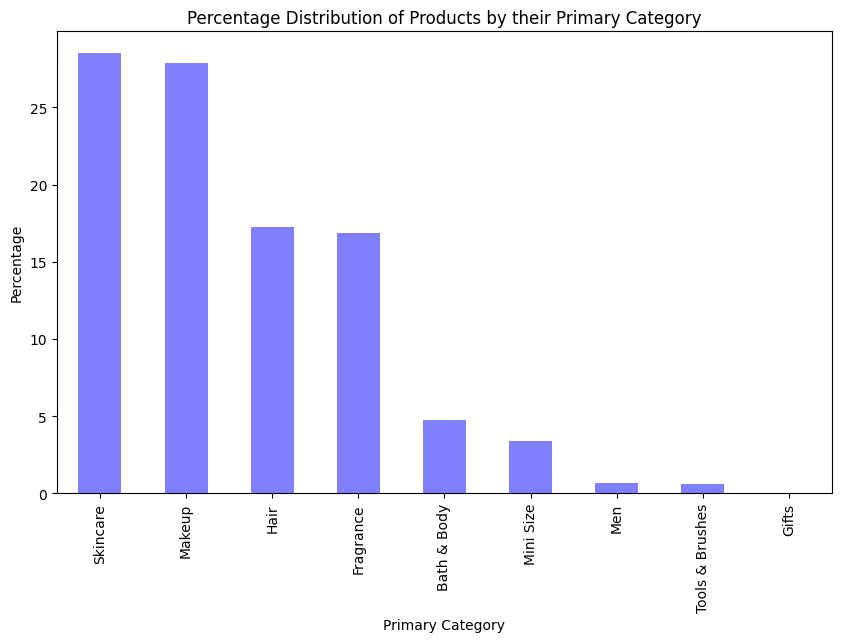

In [12]:
# bar plot of products in dataframe
counts = product_df['primary_category'].value_counts()
percentages = (counts / counts.sum())*100

plt.figure(figsize=(10, 6))
percentages.plot(kind='bar', title='Percentage Distribution of Products by their Primary Category',color='blue',alpha=.5)
plt.ylabel('Percentage')
plt.xlabel('Primary Category')
plt.show()

It is good to see that the majority of products present are skincare, now we will go ahead and remove all the other categories.

In [13]:
# drop all rows that are not skincare as primary category
product_df= product_df[product_df['primary_category']=='Skincare']
print(product_df.shape)

(2420, 27)


In [14]:
# observe columns after isolation
product_df.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [15]:
# change name of column reviews
product_df.rename(columns={'reviews':'num_reviews',
                          'price_usd':'original_price_usd',
                           'rating':'average_rating'}, inplace=True)

<ipython-input-15-8fad8f2edc84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df.rename(columns={'reviews':'num_reviews',


The 'wellness', 'high tech tools' and 'self tanners', secondary category of products is not within the scope of our current investigation. This category includes items like supplements and tools such as rollers. Our primary research and analysis are centered on products like creams, serums, toners, etc., which are chemically formulated to be applied to the face and address specific skincare concerns over time. As a result, we won't be conducting an in-depth examination of the 'wellness','high tech tools', and 'self tanners' categories at this time.

In [16]:
# drop rows in secondary category products_df we wont be using
values_to_drop = ['Self Tanners','High Tech Tools','Wellness','Shop by Concern','Mini Size','Value & Gift Sets']
product_df = product_df[~product_df['secondary_category'].isin(values_to_drop)]

Combining similar categories may enhance the clarity of analysis and visualization. "Lip Balms & Treatments" are typically regarded as forms of treatment, and its differentiation from the "Treatments" category does not substantially impact the analysis, grouping them together could be beneficial.

In [17]:
# combining treatments
categories_to_rename = ['Treatments', 'Lip Balms & Treatments']
product_df['secondary_category'] = product_df['secondary_category'].replace(categories_to_rename, 'Treatments & Serums')

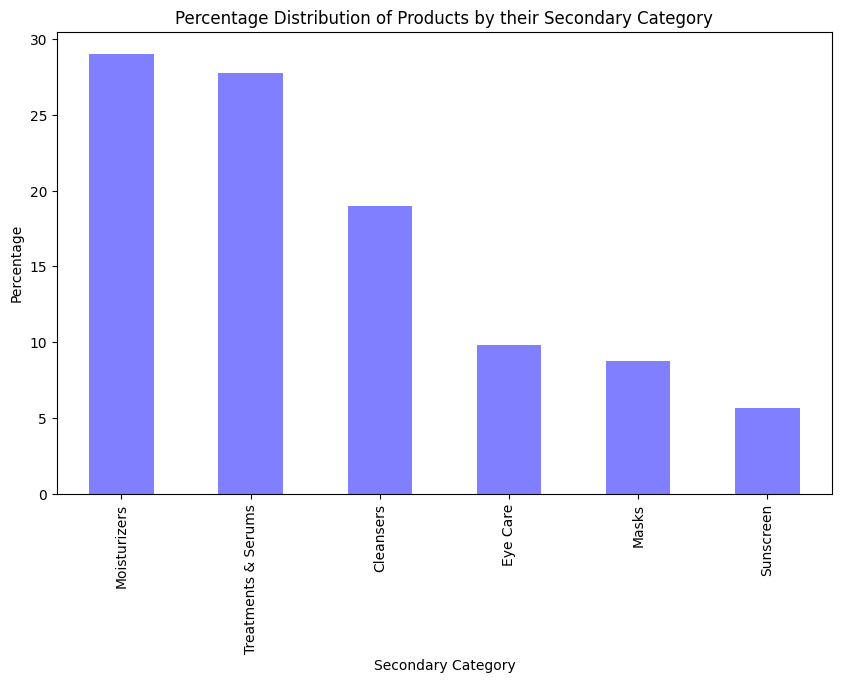

In [18]:
# secondary category of product distribution
counts = product_df['secondary_category'].value_counts()
percentages = (counts / counts.sum())*100

plt.figure(figsize=(10, 6))
percentages.plot(kind='bar', title='Percentage Distribution of Products by their Secondary Category',color='blue',alpha=.5)
plt.ylabel('Percentage')
plt.xlabel('Secondary Category')
plt.show()

In [19]:
# drop rows in tertiary category products_df we wont be using
values_to_drop = ['Facial Rollers','BB & CC Creams','Face Wipes','Makeup Removers','Holistic Wellness', 'Teeth Whitening','Blotting Papers','Hair Removal','Beauty Supplements']
product_df = product_df[~product_df['tertiary_category'].isin(values_to_drop)]

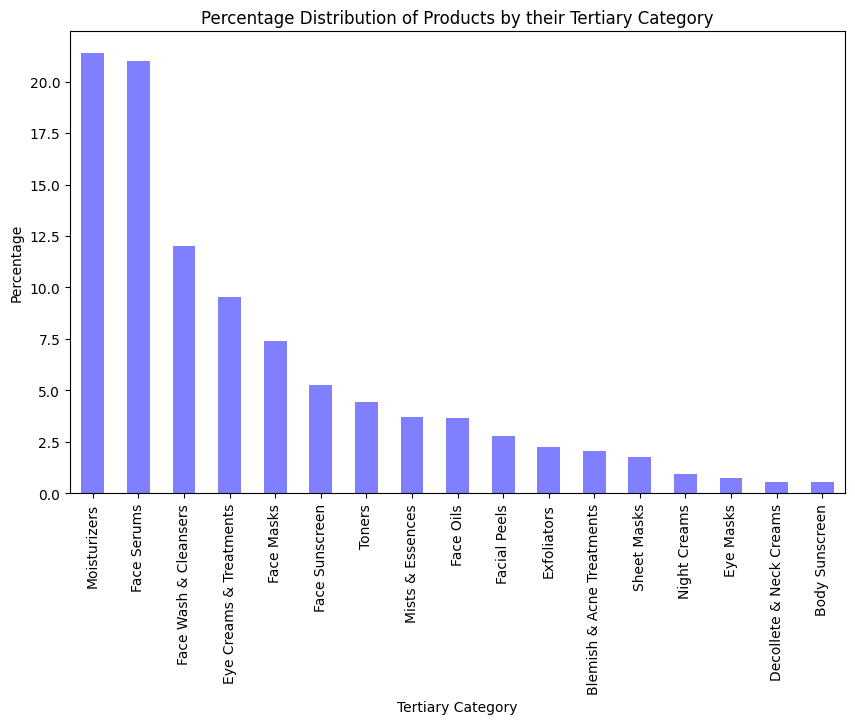

In [20]:
# tertiary category of product distribution
counts = product_df['tertiary_category'].value_counts()
percentages = (counts / counts.sum())*100

plt.figure(figsize=(10, 6))
percentages.plot(kind='bar', title='Percentage Distribution of Products by their Tertiary Category',color='blue',alpha=.5)
plt.ylabel('Percentage')
plt.xlabel('Tertiary Category')
plt.show()

*Note: While products may be marketed for specific areas of the body, it's important to note that they often contain ingredients that address broader skincare concerns.*

In [21]:
# check duplicated in products table -> product ids
duplicated_products = product_df[product_df.duplicated(['product_id'])]
duplicated_products

,product_id,product_name,brand_id,brand_name,loves_count,average_rating,num_reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price


In [22]:
product_df['average_rating'] = product_df['average_rating'].round(1)

In [23]:
# missing values on products table
sum_na = product_df.isna().sum()
percent_missing = sum_na/len(product_df)*100
percent_missing.sort_values(ascending=False)

value_price_usd       99.413333
variation_desc        99.360000
sale_price_usd        98.613333
child_max_price       81.706667
child_min_price       81.706667
highlights            16.746667
variation_value        6.026667
variation_type         4.533333
tertiary_category      3.626667
size                   3.146667
average_rating         1.920000
num_reviews            1.920000
ingredients            1.706667
sephora_exclusive      0.000000
brand_id               0.000000
child_count            0.000000
secondary_category     0.000000
primary_category       0.000000
new                    0.000000
out_of_stock           0.000000
online_only            0.000000
limited_edition        0.000000
brand_name             0.000000
product_name           0.000000
original_price_usd     0.000000
loves_count            0.000000
product_id             0.000000
dtype: float64

In [24]:
product_df['product_id'].nunique()

1875

In [25]:
# Concatenate all review DataFrames vertically
all_reviews = pd.concat([review_250df, review_1250enddf, review_250_500df, review_500_750df, review_750_1250df], ignore_index=True)

In [26]:
# get rid of products with no ingredients
product_df = product_df[product_df['ingredients'].notna()]

In [27]:
# missing values on review table
sum_na = all_reviews.isna().sum()
percent_missing = sum_na/len(all_reviews)*100
percent_missing.sort_values(ascending=False)

helpfulness                 51.314543
review_title                28.385497
is_recommended              15.349626
skin_type                   10.193337
review_text                  0.131943
author_id                    0.000000
rating                       0.000000
total_feedback_count         0.000000
total_neg_feedback_count     0.000000
total_pos_feedback_count     0.000000
submission_time              0.000000
product_id                   0.000000
product_name                 0.000000
brand_name                   0.000000
price_usd                    0.000000
dtype: float64

In [28]:
# impute skin_type by most common
mode_skin_type = all_reviews['skin_type'].mode()[0]  # Get the most common skin_type value
all_reviews['skin_type'].fillna(mode_skin_type, inplace=True)

# Check if all missing skin_type values have been imputed
missing_skin_type_count = all_reviews['skin_type'].isnull().sum()
print(f"Number of missing skin_type values after imputation: {missing_skin_type_count}")

Number of missing skin_type values after imputation: 0


In [29]:
print(f'Shape of Concatenated Reviews Dataframe: {all_reviews.shape}\nFirst 5 rows:')
all_reviews.head()

Shape of Concatenated Reviews Dataframe: (1094411, 15)
First 5 rows:


,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_type,product_id,product_name,brand_name,price_usd
0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,dry,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,combination,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,dry,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,combination,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,combination,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [30]:
# renaming of columns to prevent overlap with purchase
all_reviews.rename(columns={'price_usd':'purchase_price_usd',
                           'rating':'author_rating'}, inplace=True)

In [31]:
# merge product table and review table
cols_join = ['product_id','product_name','brand_name']
merged_df = pd.merge(product_df, all_reviews, on=cols_join, how='inner')

We will perform an **INNER JOIN** to retain only those products that have received reviews. The reviews table contains more reviewed products than the total number of products in our products table. Initially, I filtered products from the products table based on their secondary and tertiary categories to identify those relevant to skincare for our analysis. Consequently, there is a possibility that we have reviews on the reviews table for products that do not fall within the scope of our skincare investigation.


In [32]:
# new shape of merged tables
print(f'Shape of Merged Product and Review Table:\n{merged_df.shape}\nColumn names:')
merged_df.columns

Shape of Merged Product and Review Table:
(930452, 39)
Column names:


Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'average_rating', 'num_reviews', 'size', 'variation_type',
       'variation_value', 'variation_desc', 'ingredients',
       'original_price_usd', 'value_price_usd', 'sale_price_usd',
       'limited_edition', 'new', 'online_only', 'out_of_stock',
       'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price', 'author_id', 'author_rating',
       'is_recommended', 'helpfulness', 'total_feedback_count',
       'total_neg_feedback_count', 'total_pos_feedback_count',
       'submission_time', 'review_text', 'review_title', 'skin_type',
       'purchase_price_usd'],
      dtype='object')

In [33]:
# remove duplicates
# those authors who have reviews the same product more than once
print(merged_df.duplicated(subset=['author_id', 'product_id']).sum())
merged_df = merged_df.drop_duplicates(subset=['author_id', 'product_id'])

4791


In [34]:
# missing values on review table
sum_na = merged_df.isna().sum()
percent_missing = sum_na/len(merged_df)*100
percent_missing.sort_values(ascending=False)

variation_desc              99.127002
sale_price_usd              99.010869
value_price_usd             97.572653
child_max_price             55.501420
child_min_price             55.501420
helpfulness                 52.066793
review_title                28.408348
is_recommended              15.442478
highlights                  10.713749
tertiary_category            6.616461
variation_value              4.156813
variation_type               3.468008
size                         2.541211
review_text                  0.129745
author_id                    0.000000
author_rating                0.000000
product_id                   0.000000
total_neg_feedback_count     0.000000
total_feedback_count         0.000000
total_pos_feedback_count     0.000000
submission_time              0.000000
skin_type                    0.000000
child_count                  0.000000
sephora_exclusive            0.000000
secondary_category           0.000000
primary_category             0.000000
product_name

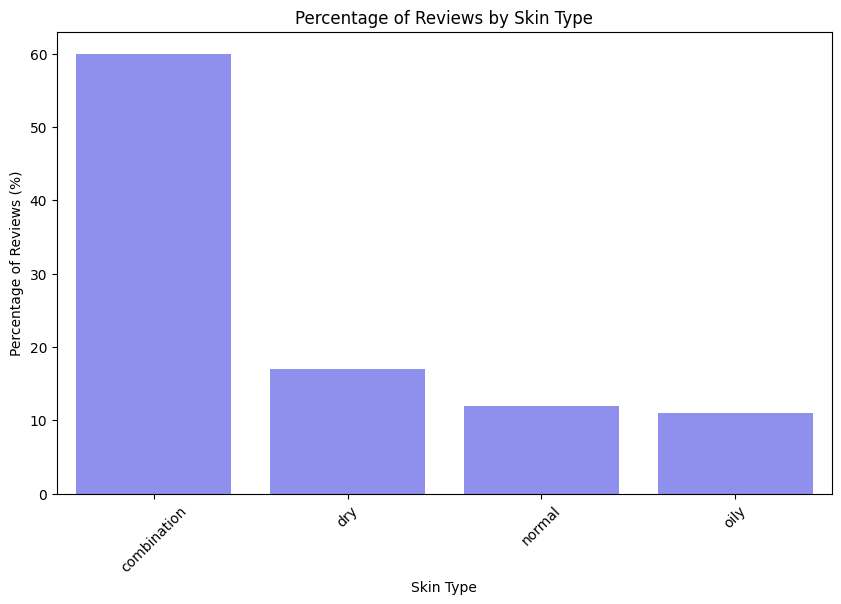

In [35]:
# Calculate the total number of reviews
total_reviews = len(merged_df)

# Calculate the percentage of reviews for each skin type
skin_type_counts = merged_df['skin_type'].value_counts()
skin_type_percentage = (skin_type_counts / total_reviews) * 100

# Plot the percentage of reviews by skin type
plt.figure(figsize=(10, 6))
sns.barplot(x=skin_type_percentage.index, y=skin_type_percentage.values,color='blue',alpha=.5)

plt.title('Percentage of Reviews by Skin Type')
plt.xlabel('Skin Type')
plt.ylabel('Percentage of Reviews (%)')
plt.xticks(rotation=45)
plt.show()

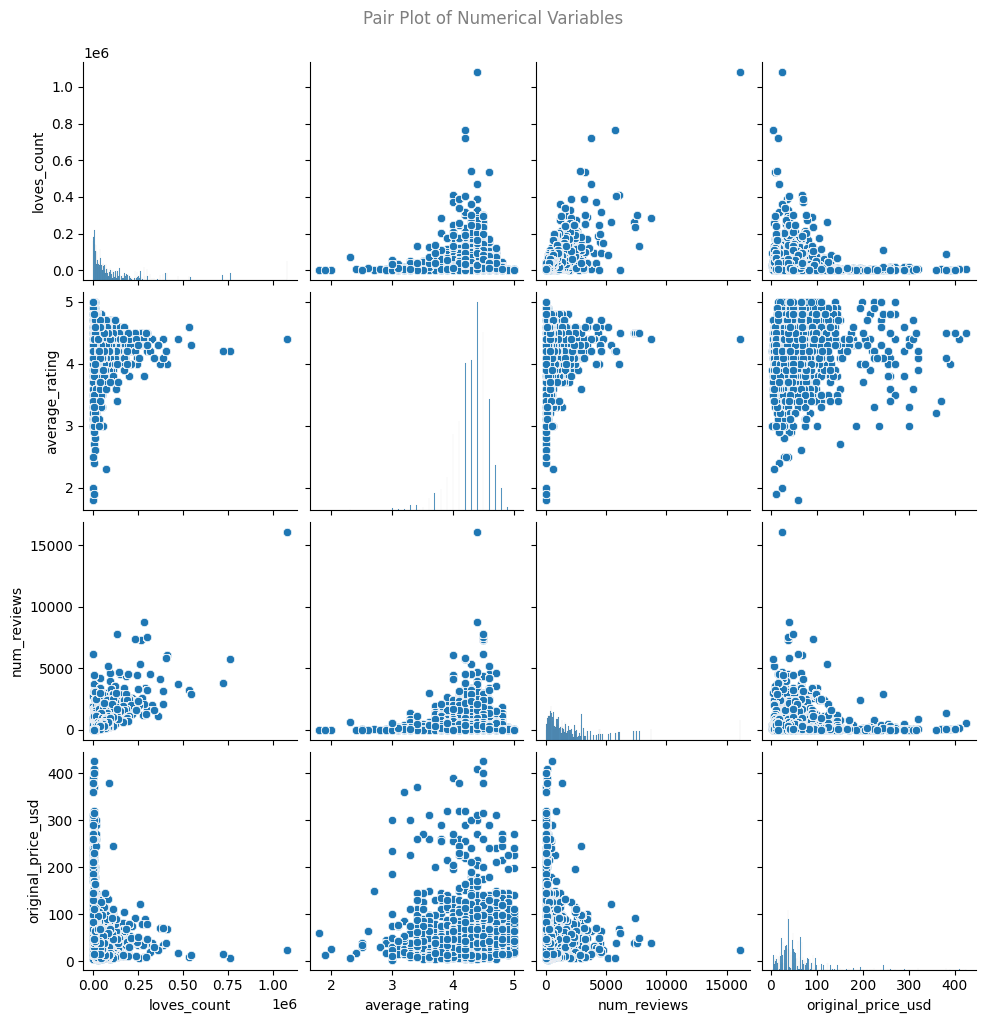

In [36]:
numerical_cols = ['loves_count', 'average_rating', 'num_reviews', 'original_price_usd']


# Pair Plots
pair_plot = sns.pairplot(merged_df[numerical_cols])
pair_plot.fig.suptitle('Pair Plot of Numerical Variables', y=1.02, alpha =0.5)
plt.show()


In [37]:
for i in range(20):
  print(i,np.sum(merged_df['author_id'].value_counts() > i))

0 472401
1 166535
2 83319
3 48217
4 30645
5 20617
6 14697
7 10919
8 8463
9 6827
10 5584
11 4724
12 4082
13 3570
14 3153
15 2830
16 2562
17 2346
18 2134
19 1974


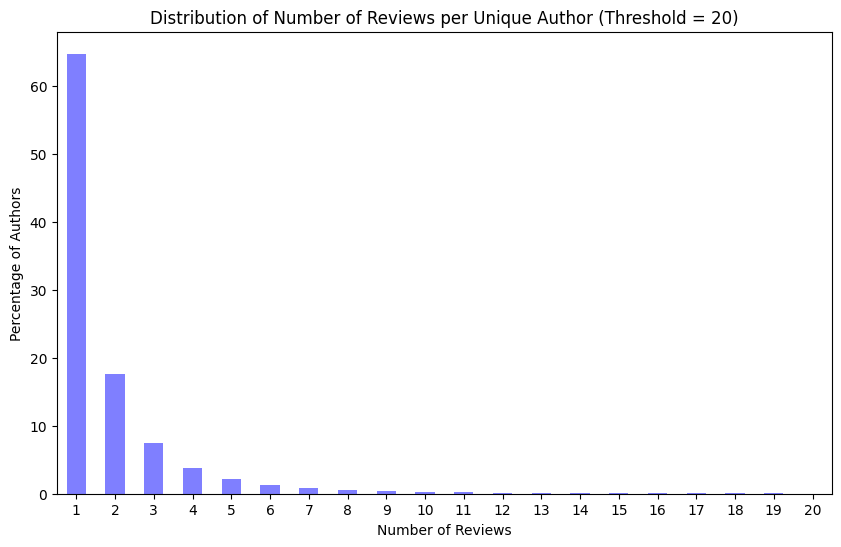

In [38]:
# Define the upper threshold
upper_threshold = 20

# Calculate the count of reviews per unique author
author_review_counts = merged_df['author_id'].value_counts()

# Filter out authors with more than the upper threshold
author_review_counts_filtered = author_review_counts[author_review_counts <= upper_threshold]

# Calculate percentages
total_authors = len(merged_df['author_id'].unique())
percentages = (author_review_counts_filtered.value_counts() / total_authors) * 100

# Plot the histogram or bar plot
plt.figure(figsize=(10, 6))
percentages.plot(kind='bar', color='blue', alpha = 0.5)
plt.title(f'Distribution of Number of Reviews per Unique Author (Threshold = {upper_threshold})')
plt.xlabel('Number of Reviews')
plt.ylabel('Percentage of Authors')
plt.xticks(rotation=0)
plt.show()


In [39]:
reviews_count = merged_df['author_id'].value_counts()
users_with_five_reviews = reviews_count[reviews_count == 5].index.tolist()

# Filter for users with exactly five reviews
five_reviews_df = merged_df[merged_df['author_id'].isin(users_with_five_reviews)]
five_reviews_count = len(five_reviews_df['author_id'].unique())
print("Number of users with exactly five reviews:", five_reviews_count)

Number of users with exactly five reviews: 10028


In [40]:
five_reviews_df.shape

(50140, 39)

In [41]:
five_reviews_df.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'average_rating', 'num_reviews', 'size', 'variation_type',
       'variation_value', 'variation_desc', 'ingredients',
       'original_price_usd', 'value_price_usd', 'sale_price_usd',
       'limited_edition', 'new', 'online_only', 'out_of_stock',
       'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price', 'author_id', 'author_rating',
       'is_recommended', 'helpfulness', 'total_feedback_count',
       'total_neg_feedback_count', 'total_pos_feedback_count',
       'submission_time', 'review_text', 'review_title', 'skin_type',
       'purchase_price_usd'],
      dtype='object')

# Modeling

In [42]:
from sklearn.metrics.pairwise import cosine_similarity

In [43]:
# Remove users whose IDs start with 'orderGen'
five_reviews_df = five_reviews_df[~five_reviews_df['author_id'].str.startswith('orderGen')]
five_reviews_df = five_reviews_df[~five_reviews_df['author_id'].str.startswith('dummyUser')]

In [44]:
five_reviews_df['author_id'] = five_reviews_df['author_id'].astype('int64')
five_reviews_df['product_id'] = five_reviews_df['product_id'].str.replace('P', '').astype('int64')

In [45]:
# product_id = 480612
# product_name = product_name_dict.get(product_id)
# if product_name:
#     print(f"The product name for ID {product_id} is: {product_name}")
# else:
#     print(f"No product found for ID {product_id}")


In [46]:
# Data Preparation
col = ['author_id', 'product_name','product_id','author_rating', 'average_rating','secondary_category','skin_type','ingredients','num_reviews','original_price_usd']
data = five_reviews_df[col].copy()

df_sorted = data.sort_values(by='author_id')

#df_sorted.to_csv('df_sorted.csv', index=False)

In [47]:
data['ingredients'].sample(5)

908774    ['Water/Aqua/Eau, Cellulose, Butylene Glycol, ...
661653    ['Pure White Petrolatum (Surgical Grade), Cott...
709334    ['Galactomyces Ferment Filtrate*, Butylene Gly...
258093    ['Water/Aqua/Eau, Dimethicone, Bifida Ferment ...
828619    ['Triisostearin, Polyglyceryl-2 Triisostearate...
Name: ingredients, dtype: object

In [48]:
import re

def clean_ingredients(ingredients):
    cleaned_ingredients_list = []
    water_words = ['water', 'aqua', 'eau','wateraquaeau','aquawatereau','wateraqua']

    for ingredient in ingredients:
        # Remove parentheses and their contents
        cleaned_ingredient = re.sub(r'\([^)]*\)', '', ingredient)
        # Remove numbers
        cleaned_ingredient = re.sub(r'\d+', '', cleaned_ingredient)
        # Remove unnecessary characters after removing parentheses
        cleaned_ingredient = re.sub(r'[^\w\s]', '', cleaned_ingredient)

        # Split into individual words
        cleaned_ingredient = cleaned_ingredient.split()

        # Lowercase all words
        cleaned_ingredient = [word.lower() for word in cleaned_ingredient]

        # Remove water-related words
        cleaned_ingredient = [word for word in cleaned_ingredient if word not in water_words]

        # Keep only the last 5
        if len(cleaned_ingredient) > 10:
            cleaned_ingredient = cleaned_ingredient[:5] + cleaned_ingredient[-5:]
            #cleaned_ingredient = cleaned_ingredient[-5:]
        cleaned_ingredients_list.append(cleaned_ingredient)

    return cleaned_ingredients_list
cleaned_ingredients_list = clean_ingredients(data['ingredients'])
ingredient_strings = [' '.join(ingredient) for ingredient in cleaned_ingredients_list]

data['cleaned_ingredients'] = ingredient_strings
# data['cleaned_ingredients'].head()

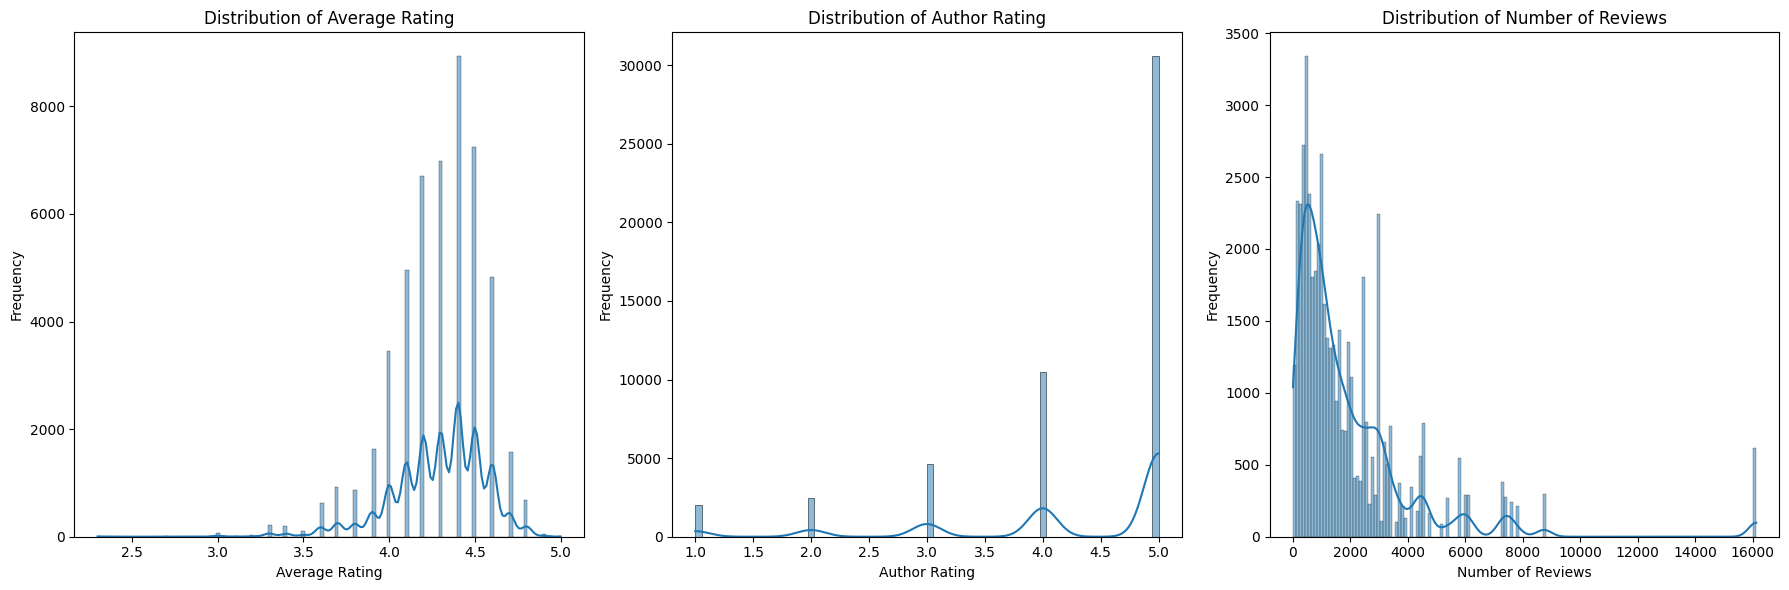

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(data['average_rating'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Average Rating')
axes[0].set_xlabel('Average Rating')
axes[0].set_ylabel('Frequency')

sns.histplot(data['author_rating'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Author Rating')
axes[1].set_xlabel('Author Rating')
axes[1].set_ylabel('Frequency')

sns.histplot(data['num_reviews'], kde=True, ax=axes[2])
axes[2].set_title('Distribution of Number of Reviews')
axes[2].set_xlabel('Number of Reviews')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50140 entries, 21 to 930423
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author_id            50140 non-null  int64  
 1   product_name         50140 non-null  object 
 2   product_id           50140 non-null  int64  
 3   author_rating        50140 non-null  int64  
 4   average_rating       50140 non-null  float64
 5   secondary_category   50140 non-null  object 
 6   skin_type            50140 non-null  object 
 7   ingredients          50140 non-null  object 
 8   num_reviews          50140 non-null  float64
 9   original_price_usd   50140 non-null  float64
 10  cleaned_ingredients  50140 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 4.6+ MB


In [52]:
from scipy import sparse
from scipy.sparse import coo_matrix

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import ParameterGrid, train_test_split
from sklearn.metrics import accuracy_score

from surprise import Dataset as SurpriseDataset, Reader, SVD, KNNBasic
from surprise.model_selection import cross_validate

from lightfm import LightFM
from lightfm.data import Dataset
from lightfm.evaluation import precision_at_k, auc_score, recall_at_k
from lightfm.cross_validation import random_train_test_split
!pip install lightfm
!pip install surprise

In [53]:
# TF-IDF Vectorization of the cleaned ingredients
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2, max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_ingredients'])
tfidf_features = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=data.index)

# Label Encoding for categorical features
label_encoders = {
    'skin_type': LabelEncoder(),
    'secondary_category': LabelEncoder()
}
for feature, encoder in label_encoders.items():
    data[f'{feature}_encoded'] = encoder.fit_transform(data[feature])

# Print Mapping Dictionaries (for reference)
for feature, encoder in label_encoders.items():
    print(f"{feature.capitalize()} Map:")
    print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
    print()

# Feature Normalization
feature_columns = ['author_rating', 'average_rating', 'num_reviews','original_price_usd']
for column in feature_columns:
    data[f'normalized_{column}'] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())

# Interaction  Calculation
#data['interaction_weight'] = (1 - data['normalized_num_reviews']) * data['normalized_author_rating']

data['avg_rating_per_skin_type'] = data.groupby(['skin_type_encoded', 'product_id'])['normalized_average_rating'].transform('mean')


# Also maintains the emphasis on boosting less popular items
data['interaction_weight'] = (
    data['normalized_average_rating'] +
    data['avg_rating_per_skin_type'] +
    1 / (1 + data['normalized_num_reviews'])
)

# User and Item features
user_features_df = pd.concat([data[['normalized_author_rating', 'skin_type_encoded']], data[['author_id']]], axis=1).drop_duplicates()
item_features_df = pd.concat([data[['normalized_average_rating','normalized_num_reviews','normalized_original_price_usd', 'secondary_category_encoded']], tfidf_features, data[['product_id']]], axis=1).drop_duplicates()

# Create Interaction Matrix
interaction_matrix = sparse.coo_matrix((data['interaction_weight'], (data['author_id'].astype('category').cat.codes, data['product_id'].astype('category').cat.codes)))

# Initialize a new LightFM dataset
dataset = Dataset()
# Fit the dataset to the users and items with features
dataset.fit(
    users=data['author_id'].unique(),
    items=data['product_id'].unique(),
    user_features=user_features_df.columns,
    item_features=item_features_df.columns
)

# Build user features
user_features = dataset.build_user_features(
    (row['author_id'], row.drop('author_id').to_dict()) for index, row in user_features_df.iterrows()
)

# Build item features
item_features = dataset.build_item_features(
    (row['product_id'], row.drop('product_id').to_dict()) for index, row in item_features_df.iterrows()
)
# Split Interaction Matrix
train, test = random_train_test_split(interaction_matrix, test_percentage=0.2, random_state=42)

# # Train LightFM Model
# model = LightFM(no_components=20, learning_schedule='adagrad', loss='warp', random_state=42)
# model.fit(train, user_features=user_features, item_features=item_features, epochs=10, num_threads=4, verbose=True)

# # Evaluate the model on the training data
# train_precision_score = precision_at_k(model, train, user_features=user_features, item_features=item_features, k=5).mean()
# train_auc_score = auc_score(model, train, user_features=user_features, item_features=item_features).mean()
# train_recall_score = recall_at_k(model, train, user_features=user_features, item_features=item_features, k=5).mean()

# # Evaluate the model on the testing data
# test_precision_score = precision_at_k(model, test, user_features=user_features, item_features=item_features, k=5).mean()
# test_auc_score = auc_score(model, test, user_features=user_features, item_features=item_features).mean()
# test_recall_score = recall_at_k(model, test, user_features=user_features, item_features=item_features, k=5).mean()

# # Print the evaluation metrics for both training and testing datasets
# print(f"Training Precision at k: {train_precision_score:.4f}")
# print(f"Training AUC: {train_auc_score:.4f}")
# print(f"Testing Precision at k: {test_precision_score:.4f}")
# print(f"Testing AUC: {test_auc_score:.4f}")
# print(f"Training Recall at k: {train_recall_score:.4f}")
# print(f"Testing Recall at k: {test_recall_score:.4f}")

Skin_type Map:
{'combination': 0, 'dry': 1, 'normal': 2, 'oily': 3}

Secondary_category Map:
{'Cleansers': 0, 'Eye Care': 1, 'Masks': 2, 'Moisturizers': 3, 'Sunscreen': 4, 'Treatments & Serums': 5}



In [67]:
# Placeholder for data loading
# data = pd.read_csv('path_to_your_dataset.csv')

# Define user and item ids, and interaction values for the neural network
user_ids = data['author_id'].astype('category').cat.codes.values
item_ids = data['product_id'].astype('category').cat.codes.values
interactions = data['interaction_weight'].values

# Split the dataset for the neural network
def split_dataset(features, labels, test_size=0.2, random_state=42):
    return train_test_split(features, labels, test_size=test_size, random_state=random_state)

features = np.column_stack((user_ids, item_ids))
X_train, X_test, y_train, y_test = split_dataset(features, interactions)

# LightFM Model Grid Search
lightfm_param_grid = {
    'no_components': [5, 20],
    'learning_schedule': ['adagrad'],
    'loss': ['warp']
}

best_score = 0
best_params = None

for params in ParameterGrid(lightfm_param_grid):
    model = LightFM(**params, random_state=42)
    model.fit(train, user_features=user_features, item_features=item_features, epochs=10, num_threads=4, verbose=False)
    score = auc_score(model, test, user_features=user_features, item_features=item_features).mean()
    print(f"Params: {params}, Test AUC: {score:.4f}")
    if score > best_score:
        best_score = score
        best_params = params

print(f"Best Params: {best_params}, Best Test AUC: {best_score:.4f}")

# SVD Model Grid Search
reader = Reader(rating_scale=(0, 1))
surprise_data = SurpriseDataset.load_from_df(data[['author_id', 'product_id', 'normalized_author_rating',]], reader)

best_svd_rmse = np.inf
best_svd_params = None

best_knn_rmse = np.inf
best_knn_params = None

svd_param_grid = {
    'n_factors': [70, 90],
    'n_epochs': [10,30],
    'lr_all': [0.005, 0.01],
    'reg_all': [0.02, 0.1]
}

for params in ParameterGrid(svd_param_grid):
    svd = SVD(**params)
    cross_val_results = cross_validate(svd, surprise_data, measures=['RMSE'], cv=3, verbose=False)
    avg_rmse = np.mean(cross_val_results['test_rmse'])
    print(f"Params: {params}, Avg RMSE: {avg_rmse:.4f}")
    if avg_rmse < best_svd_rmse:
        best_svd_rmse = avg_rmse
        best_svd_params = params
# Output the best SVD parameters
print(f"Best SVD Params: {best_svd_params}, Best Avg RMSE: {best_svd_rmse:.4f}")

# k-NN Model Grid Search
knn_param_grid = {
    'k': [20, 40],
    'sim_options': [
        {'name': 'msd', 'user_based': False},
        {'name': 'msd', 'user_based': True}
    ]
}

for params in ParameterGrid(knn_param_grid):
    knn_model = KNNBasic(k=params['k'], sim_options=params['sim_options'])
    cross_val_results = cross_validate(knn_model, surprise_data, measures=['RMSE'], cv=3, verbose=True)
    avg_rmse = np.mean(cross_val_results['test_rmse'])
    print(f"Params: {params}, Avg RMSE: {avg_rmse:.4f}")
    if avg_rmse < best_knn_rmse:
        best_knn_rmse = avg_rmse
        best_knn_params = params

# Output the best k-NN parameters
print(f"Best k-NN Params: {best_knn_params}, Best Avg RMSE: {best_knn_rmse:.4f}")

Params: {'learning_schedule': 'adagrad', 'loss': 'warp', 'no_components': 5}, Test AUC: 0.8110
Params: {'learning_schedule': 'adagrad', 'loss': 'warp', 'no_components': 20}, Test AUC: 0.8104
Best Params: {'learning_schedule': 'adagrad', 'loss': 'warp', 'no_components': 5}, Best Test AUC: 0.8110
Params: {'lr_all': 0.005, 'n_epochs': 10, 'n_factors': 70, 'reg_all': 0.02}, Avg RMSE: 0.2705
Params: {'lr_all': 0.005, 'n_epochs': 10, 'n_factors': 70, 'reg_all': 0.1}, Avg RMSE: 0.2668
Params: {'lr_all': 0.005, 'n_epochs': 10, 'n_factors': 90, 'reg_all': 0.02}, Avg RMSE: 0.2732
Params: {'lr_all': 0.005, 'n_epochs': 10, 'n_factors': 90, 'reg_all': 0.1}, Avg RMSE: 0.2685
Params: {'lr_all': 0.005, 'n_epochs': 30, 'n_factors': 70, 'reg_all': 0.02}, Avg RMSE: 0.2630
Params: {'lr_all': 0.005, 'n_epochs': 30, 'n_factors': 70, 'reg_all': 0.1}, Avg RMSE: 0.2588
Params: {'lr_all': 0.005, 'n_epochs': 30, 'n_factors': 90, 'reg_all': 0.02}, Avg RMSE: 0.2657
Params: {'lr_all': 0.005, 'n_epochs': 30, 'n_fact